### 연습

1. csv 폴더 안 num_1 폴더에 있는chipotle.tsv 로드:
2. order_id 컬럼 데이터 타입을 str로 변경 (통계요약정보describe() 는 숫자형의 데이터만 계산)
3. 가장 많이 주문한 item_name 출력
4. item 당 주문 총량의 top10을 바 그래프로 표시
5. item_price의 '$'를 제거하고 데이터 타입을 float형태로 변경
6. 주문당 평균 계산 금액 출력

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../230331/230403/230404/csv/num_1/chipotle.tsv', sep = '\t')

In [4]:
# order_id를 str의 형태로 변경

df['order_id'] = df['order_id'].astype(str)

In [6]:
# 가장 많이 주문한 아이템의 이름을 출력하시오.

df2 = df[['quantity','item_name']].groupby('item_name').sum()

In [7]:
df2 = df2.sort_values('quantity',ascending = False)

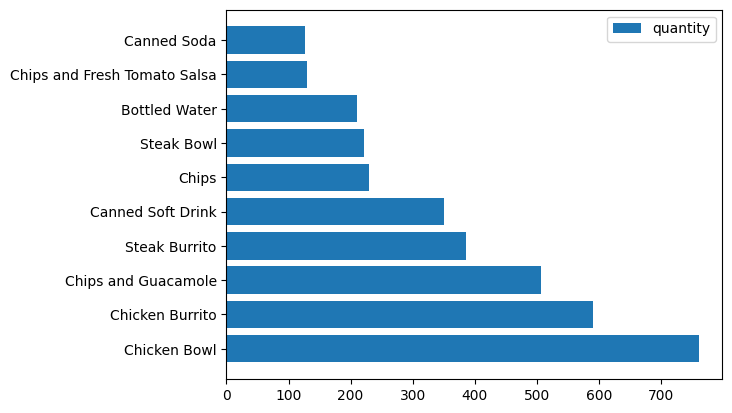

In [14]:
# 주문 당 주문총량 top10을 그래프로 시각화 표시 (바그래프)

x = df2.head(10).index
y = df2.head(10)['quantity']

plt.barh(x,y, label = 'quantity')
plt.legend()
plt.show()

In [11]:
df2.index[0]

'Chicken Bowl'

In [15]:
# item_price의 '$'를 제거한다.

# case 1
df['item_price'] = df['item_price'].str.replace('$','')

# case 2 - replace 대신 lstrip 활용

# case 3 - apply 활용

# def change(x):
#     # x의 데이터 타입은? => 문자
#     # x = x.replace("$", "")
#     x = x.lstrip('$')
#     return x

    
# df['item_price'].apply(change)

# case 4 - lambda 활용

# df['item_price'].apply(lambda y : y.replace('$', ""))

In [20]:
df['item_price'] = df['item_price'].astype(float)

In [23]:
df.groupby('order_id').mean()

,item_price
order_id,
1,2.890000
10,6.600000
100,5.040000
1000,10.250000
1001,5.040000
...,...
995,8.316667
996,10.750000
997,22.500000


In [40]:
# chicken bowl 메뉴를 2개 이상 주문한 고객들이 주문한 chicken bowl의 평균 주문 수량
# df['quantity'] >= 2, df['item_menu'] == chicken bowl
df.loc[(df['quantity'] >= 2) & (df['item_name'] == 'Chicken Bowl')]['quantity'].mean()

2.0606060606060606